In [31]:
# Andy Vo, ECGR 4106 Homework 0
# 01/23/2022

# Problem 4

In [32]:
root_dir = "drive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [33]:
# # another neural network for running a pretrained
# version of it on another image
# mobilenet_v2, instance of the class 

import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [34]:
# Preprocess the image
# Scale the input image to 256 x 256, 
# crop the image to 224 x 224 around the center
# transform it to a tensor and normalize RGB components

from torchvision import transforms

preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean= [0.485, 0.456, 0.406],
            std= [0.229, 0.224, 0.225]
        )])

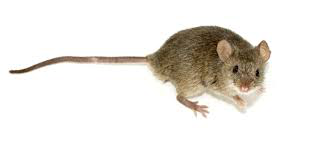

In [35]:
# File directory of image in google docs
# "../Images/dog.jpeg"
# "../Images/rabbit.jpeg"
# "../Images/ball.jpeg"
# "../Images/laptop.jpg"
# "../Images/mice.jpeg"

from PIL import Image
img = Image.open("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework0/Images/mice.jpeg")

img

In [36]:
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model



In [37]:
out = model(input_batch)
out

tensor([[ 2.1889e+00, -3.3480e-01, -1.9593e+00, -2.8985e+00, -2.2539e-01,
          6.7970e+00,  2.4705e+00, -1.7969e+00,  3.4450e-01,  1.1409e+00,
          1.4427e+00, -1.1963e+00,  1.4343e+00,  3.1339e+00, -2.8919e+00,
         -2.0900e+00,  2.6486e+00, -2.0018e+00, -1.6681e+00,  2.0225e-01,
          8.3283e-01,  7.2929e-01, -2.8134e+00, -1.9806e-01,  3.1357e+00,
         -3.2505e+00, -5.0104e-01, -1.0999e+00, -1.8081e+00,  5.3435e-01,
          5.8935e-02,  1.2353e+00,  2.7500e+00, -4.5908e-01, -3.8874e-01,
         -7.3489e-01,  1.8466e+00, -5.6758e-01,  4.4906e-01, -3.3041e+00,
         -2.9224e+00, -1.7725e+00, -2.7818e+00, -3.8499e-01, -1.0648e+00,
         -3.7601e+00, -4.3141e+00,  2.0348e+00, -5.4852e+00, -1.9335e+00,
         -2.6379e+00,  3.0092e+00, -9.6653e-01, -9.0748e-01, -3.0450e+00,
         -4.8963e+00, -4.0771e+00, -4.7808e+00, -2.4374e+00, -2.3383e+00,
          8.6388e-01, -3.5770e+00, -1.4098e+00, -2.4146e+00, -3.3727e+00,
         -4.6255e+00,  9.4693e-01, -1.

In [38]:
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

In [39]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-01-27 00:05:49--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.2’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-01-27 00:05:49 (107 MB/s) - ‘imagenet_classes.txt.2’ saved [10472/10472]



In [40]:
# Read the categories
with open("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework0/Text_Files/imagenet_classes.txt") as f:
    categories = [s.strip() for s in f.readlines()]


In [41]:
_, index = torch.max(out, 1)

In [42]:
# Accessing the label
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
categories[index[0]], percentage[index[0]].item()

('spatula', 30.183528900146484)

In [43]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

spatula 0.3018372654914856
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus 0.14091284573078156
mousetrap 0.13735710084438324
wood rabbit, cottontail, cottontail rabbit 0.07564477622509003
screwdriver 0.05391944572329521


In [44]:
_, indices = torch.sort(out, descending=True)
[(categories[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('spatula', 30.183528900146484),
 ('platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus',
  14.091354370117188),
 ('mousetrap', 13.735725402832031),
 ('wood rabbit, cottontail, cottontail rabbit', 7.564493179321289),
 ('screwdriver', 5.391955375671387)]

In [45]:
# ****************** Question 4, ptflops ************** #

# Getting the computational complexity of algorithms (number of MACs, and model size)
# from the resnet101() model

!pip install ptflops
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = models.mobilenet_v2()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

MobileNetV2(
  3.505 M, 100.000% Params, 0.32 GMac, 100.000% MACs, 
  (features): Sequential(
    2.224 M, 63.451% Params, 0.319 GMac, 99.600% MACs, 
    (0): ConvBNActivation(
      0.001 M, 0.026% Params, 0.012 GMac, 3.760% MACs, 
      (0): Conv2d(0.001 M, 0.025% Params, 0.011 GMac, 3.384% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(0.0 M, 0.002% Params, 0.001 GMac, 0.251% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(0.0 M, 0.000% Params, 0.0 GMac, 0.125% MACs, inplace=True)
    )
    (1): InvertedResidual(
      0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
      (conv): Sequential(
        0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
        (0): ConvBNActivation(
          0.0 M, 0.010% Params, 0.005 GMac, 1.504% MACs, 
          (0): Conv2d(0.0 M, 0.008% Params, 0.004 GMac, 1.128% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
   